# Linear Regression

## 1 How a linear regression algorithm trains?

Linear Regression algorithm determines to predict a dependent variable with the help of independent variables by determining the right coefficents that best describe the model.

Steps involved in training the Linear Regression:
    1. Fit a line at random and calculte the MSE
    2. Use gradient descent and update the loss to optimze the fit
    3. repeat step 2 until best fit line is reached.

## 2 Load the sklearn boston dataset

In [1]:
#imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [2]:
#load data

X, y = load_boston(return_X_y=True)

X = pd.DataFrame(X)

#header for X
header_X = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
X.columns = header_X

y = pd.DataFrame(y)
y.columns = ["MEDV"]

 Variables in order:
 - CRIM:     per capita crime rate by town
 - ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS:    proportion of non-retail business acres per town
 - CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX:      nitric oxides concentration (parts per 10 million)
 - RM:       average number of rooms per dwelling
 - AGE:      proportion of owner-occupied units built prior to 1940
 - DIS:      weighted distances to five Boston employment centres
 - RAD:      index of accessibility to radial highways
 - TAX:      full-value property-tax rate per 10,000 dollors
 - PTRATIO:  pupil-teacher ratio by town
 - B:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT:    percentage lower status of the population
 - MEDV:     Median value of owner-occupied homes in 1000's(dollors)
 
 Reference: http://lib.stat.cmu.edu/datasets/boston

In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
#Pre processing

# Check for na,null,Nan
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## 3 Data Visualization

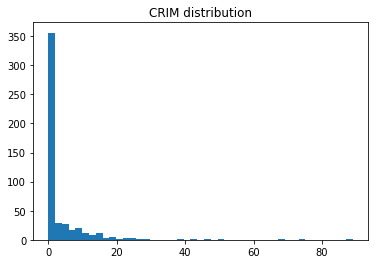

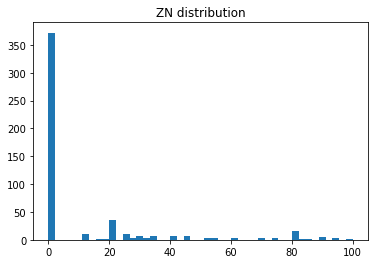

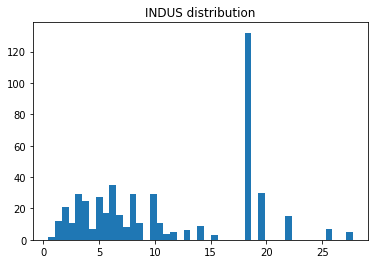

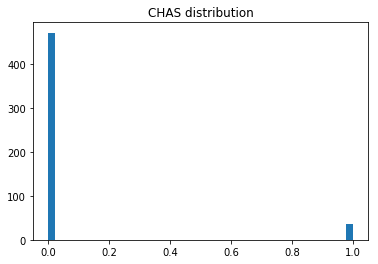

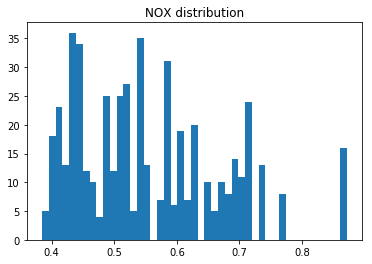

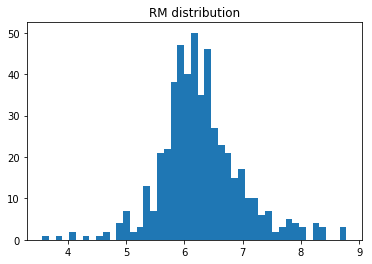

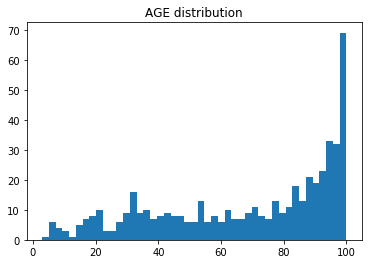

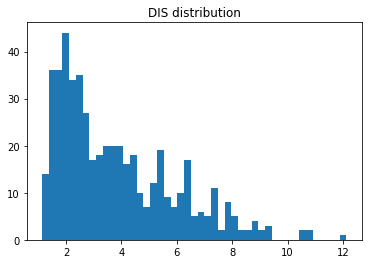

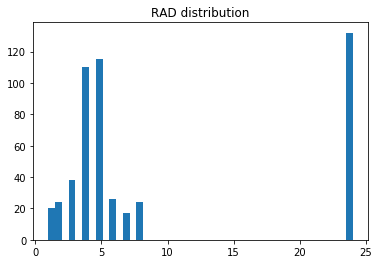

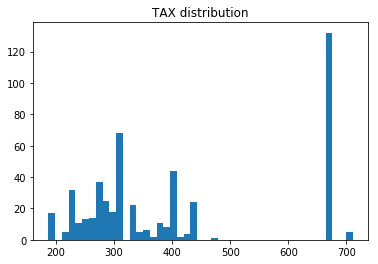

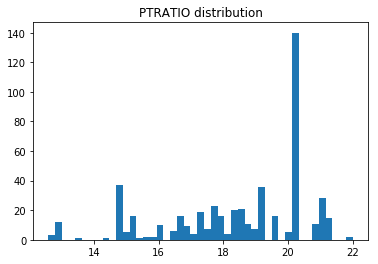

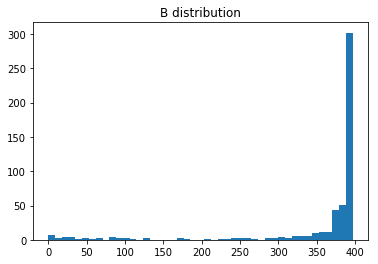

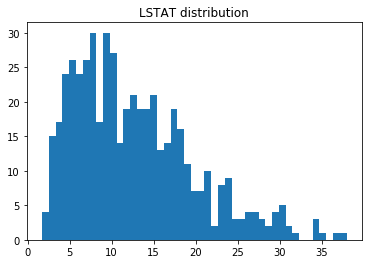

In [6]:
# data bistibution histogram 
for col in X.columns:
    plt.title(col +" distribution")
    plt.hist(X[col], bins=45)
    plt.show()

From the above distribution plots it can be observed that the attributes CHAS and RAD seem to be discrete while the other atrributes are continous 

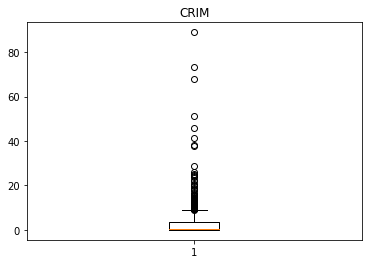

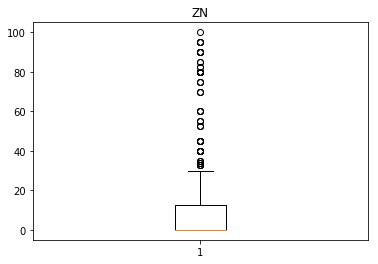

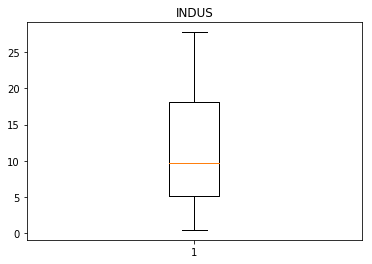

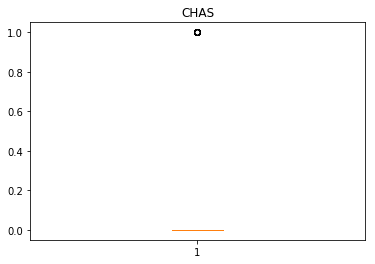

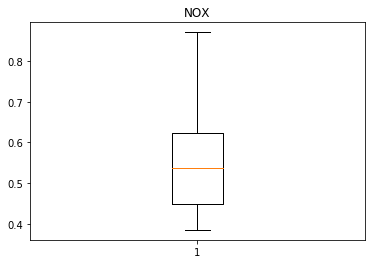

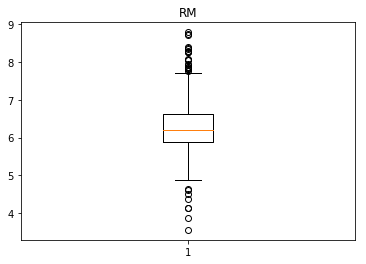

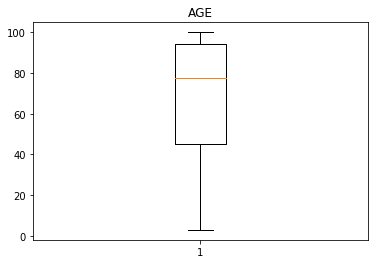

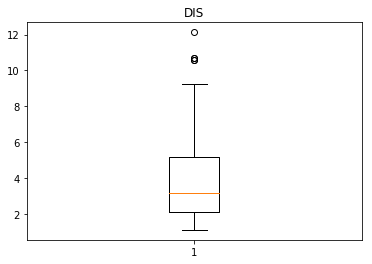

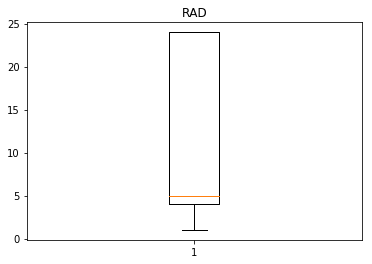

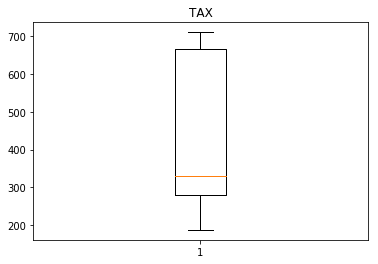

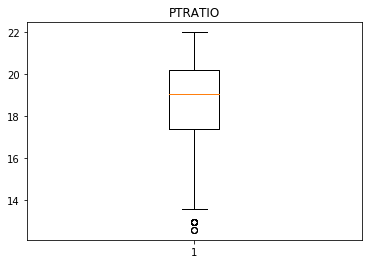

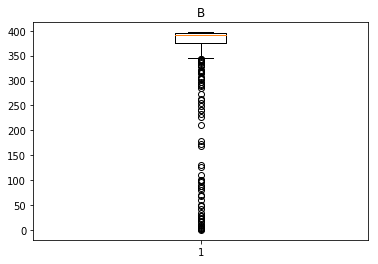

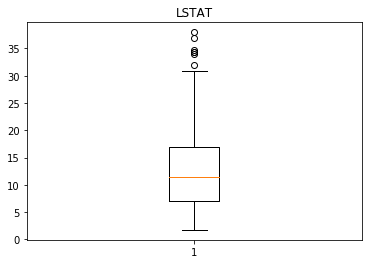

In [7]:
# outliers
for col in X.columns:
    fig, ax = plt.subplots()
    ax.boxplot(X[col])
    ax.set_title(col)
    plt.show()


Attributes CRIM, ZN, RM and B have lot of ouliers, while LSTAT,PTRATIO and DIS have few outliers

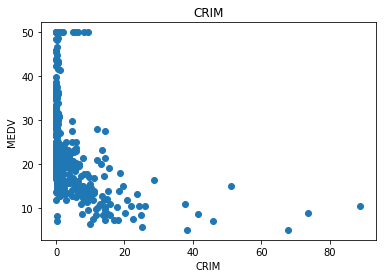

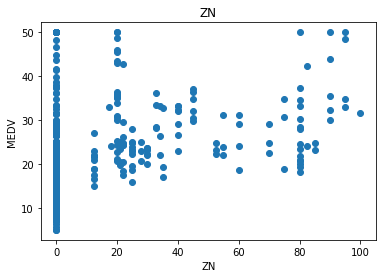

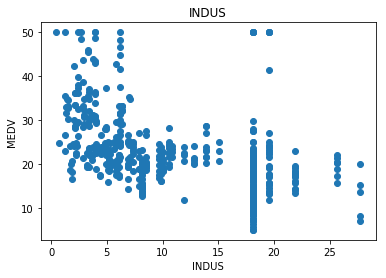

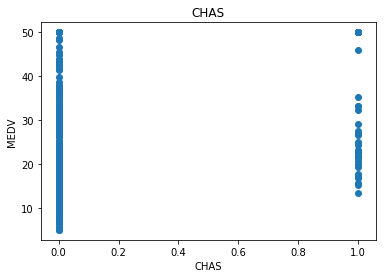

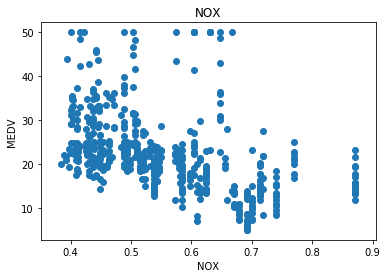

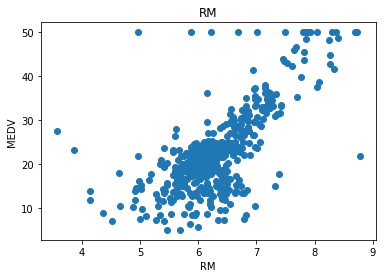

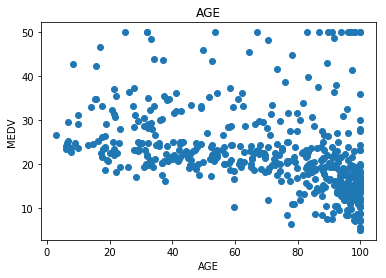

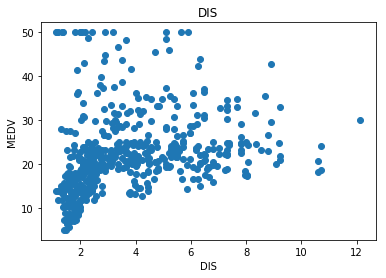

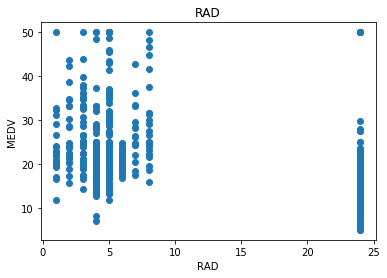

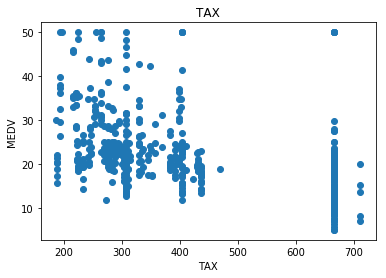

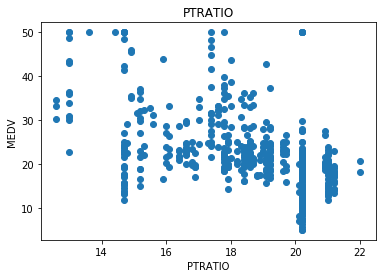

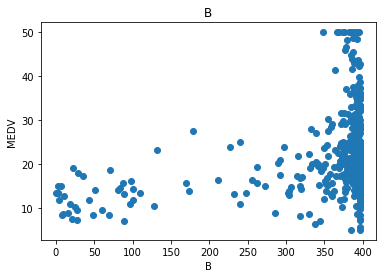

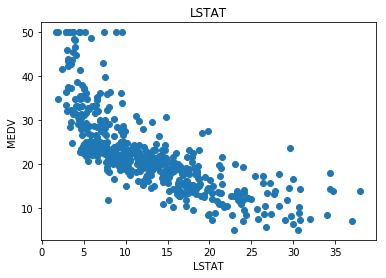

In [8]:
# plot columns against MEDV
columns = X.columns
for col in X.columns:
    fig, ax = plt.subplots()
    ax.scatter(X[col],y)
    ax.set_xlabel(col)
    ax.set_ylabel("MEDV")
    ax.set_title(col)
    plt.show()

From the above plots:
- A positive trend can be noticed between the attribute RM and target variable.
- A negative tred can be observed between MEDV and CRIM,INDUS,NOX,TAX,PTRATIO and LSTAT
- Age attribute seems to have no affect on MEDV

## 4 Calculate the pearson correlation matrix of the data

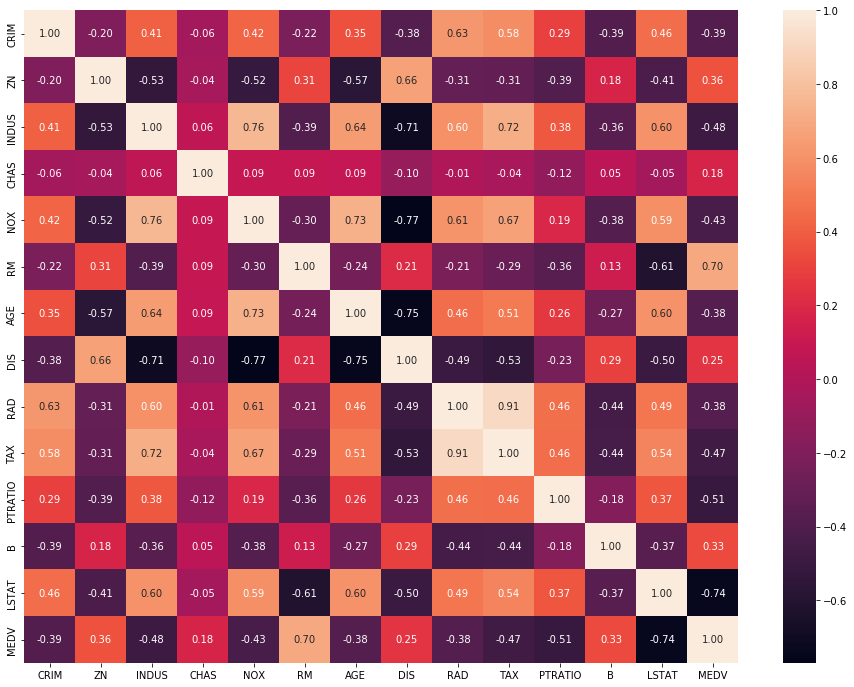

In [9]:
#pearson correlation
data = X.copy()
data["MEDV"] = y
pearson_corr = data.corr()
plt.figure(figsize = (16, 12))
sns.heatmap(pearson_corr, annot = True, fmt = '.2f')

From the correlation matrix, it can inferred that:
    - The attributes CHAS, DIS, B, ZN and RM are positively correlated to MEDV
    - The attributes AGE,RAD,CRIM,NOX,TAX,INDUS,PTRATIP and LSTAT are negatively correlated to MEDV
    - The attributes RAD is strongly positively corelated to TAX with an absolute value of 0.91
    - The attributes AGE,NOX and DIS are strongly negatively corelated with an absolute value of 0.75 and 0.77 respectively
 

## 5 Feature Selection
Select features which are more related to the target variable using graphs and the correlation matrix, are the both indicating the same features? (MEDV is the target variable)

Features that show a tred from graphs:
    1. RM
    2. NOX
    3. DIS
    4. PTRATIO
    5. INDUS
    6. LSTAT
    
The top features related to target variable using correlation matrix:
    1. RM
    2. LSTAT
    3. PTRATIO
    4. INDUS
    5. TAX
    6. NOX

The top features related to target variable using graphs and correlation matrix are
    1. RM
    2. LSTAT
    3. PTRATIO
    4. INDUS
    5. TAX
    6. DIS


Are the both indicating the same features?
There is a huge overlap between both. But the stregth of correlation is not as intutive from graphs compared to that of corelation matrix.
 

## 6 Feature selection Cont.,
Compare correlation of feature between themselves and if two features are highly correlated remove one of them (the one with lesser correlation with the target variable) 

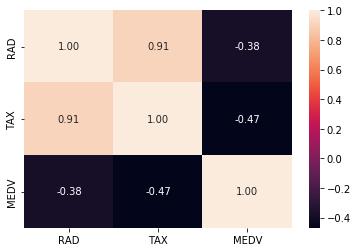

In [10]:
# RAD and TAX

data = X.loc[:, ('RAD','TAX')]
data['MEDV'] = y
corr = data.corr()
sns.heatmap(corr, annot = True, fmt = '.2f')


As attributes TAX and RAD have strong correlation (0.91). We can remove RAD(0.38) as its strength with MEDV is less than that of TAX(0.47)

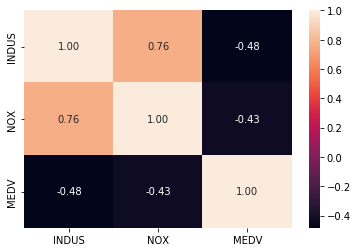

In [11]:
# INDUS and NOX
data = X.loc[:, ('INDUS','NOX')]
data['MEDV'] = y
corr = data.corr()
sns.heatmap(corr, annot = True, fmt = '.2f')

As attributes INDUS and NOX have strong correlation (0.76). We can remove NOX(0.43) as its strength with MEDV is less than that of INDUS(0.48)

In conculsion, we can narrow down from the entire dataset to just 7 attributes post feature selection.
Dropping CHAS and RAD as they are categorical and CRIM,B and ZN as they have significant ouliers.
The selected attributes are:

    1. INDUS
    2. PTRATIO
    3. LSTAT
    4. RM
    5. AGE
    6. DIS
    7. TAX

# Modeling

## Entire Dataset

## 8 Split into train and test

In [12]:
#entire dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

print("size of X_train is: ", X_train.shape)
print("size of X_test is: ", X_test.shape)
print("size of y_train is: ", y_train.shape)
print("size of y_test is: ", y_test.shape)

size of X_train is:  (404, 13)
size of X_test is:  (102, 13)
size of y_train is:  (404, 1)
size of y_test is:  (102, 1)


## 9 Normalize the data

In [13]:
# min max scaling the variables
scaler =  MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)

## 10 Train the model and perform hyper parameter tuning using cross validation

In [14]:
# training linear regression model on the training set
lr = LinearRegression() 
lr.fit(X_train_scaled,y_train_scaled)

LinearRegression()

## 11 Test the model on test set

In [15]:
# making predictions for the training set
y_train_pred = lr.predict(X_train_scaled)
print("size of y_pred is: ", y_train_pred.shape)

size of y_pred is:  (404, 1)


In [16]:
# checking the performance on the training set
print('Mean squared error for training set: %.2f' % mean_squared_error(y_train_scaled, y_train_pred))
print('Coefficient of determination for training set: %.2f' % r2_score(y_train_scaled, y_train_pred))

Mean squared error for training set: 0.01
Coefficient of determination for training set: 0.73


In [17]:
# making predictions for the testing set
y_test_pred = lr.predict(X_test_scaled)

In [18]:
# checking the performance on the testing set
print('Mean squared error for testing set: %.2f' % mean_squared_error(y_test_scaled, y_test_pred))
print('Coefficient of determination for testing set: %.2f' % r2_score(y_test_scaled, y_test_pred))

Mean squared error for testing set: 0.01
Coefficient of determination for testing set: 0.76


In [19]:
#transform y to actual scale
y_test_pred = scaler.inverse_transform(y_test_pred)

The test R squared is greater than that of training and has very little difference. Thus the model has generalized well.

In [20]:
#crossvalidation k =5
cv = cross_val_score(lr, X_train_scaled, y_train_scaled, cv=5)
cv.mean()

0.7065787131512156

## Selected Features from step 5

## Split into train and test

In [21]:
#selected featires from step 5
#     1. RM
#     2. LSTAT
#     3. PTRATIO
#     4. INDUS
#     5. TAX
#     6. DIS


X_s5 = X.loc[:, ('RM','LSTAT','PTRATIO','INDUS','TAX','DIS')]


X_train_s5, X_test_s5, y_train_s5, y_test_s5 = train_test_split(X_s5, y, test_size = 0.2, random_state = 100)

X_train_s5 = X_train_s5.reset_index(drop = True)
X_test_s5 = X_test_s5.reset_index(drop = True)
y_train_s5 = y_train_s5.reset_index(drop = True)
y_test_s5 = y_test_s5.reset_index(drop = True)

print("size of X_train_s5 is: ", X_train_s5.shape)
print("size of X_test_s5 is: ", X_test_s5.shape)
print("size of y_train_s5 is: ", y_train_s5.shape)
print("size of y_test_s5 is: ", y_test_s5.shape)

size of X_train_s5 is:  (404, 6)
size of X_test_s5 is:  (102, 6)
size of y_train_s5 is:  (404, 1)
size of y_test_s5 is:  (102, 1)


In [22]:
# min max scaling the variables
scaler =  MinMaxScaler()
scaler.fit(X_train_s5)
X_train_scaled_s5 = scaler.transform(X_train_s5)
X_test_scaled_s5 = scaler.transform(X_test_s5)

scaler.fit(y_train_s5)
y_train_scaled_s5 = scaler.transform(y_train_s5)
y_test_scaled_s5 = scaler.transform(y_test_s5)

In [23]:
# training linear regression model on the training set
lr_s5 = LinearRegression() 
lr_s5.fit(X_train_scaled_s5,y_train_scaled_s5)

LinearRegression()

In [24]:
# making predictions for the training set
y_train_pred_s5 = lr_s5.predict(X_train_scaled_s5)

In [25]:
# checking the performance on the training set
print('Mean squared error for training set: %.2f' % mean_squared_error(y_train_scaled_s5, y_train_pred_s5))
print('Coefficient of determination for training set: %.2f' % r2_score(y_train_scaled_s5, y_train_pred_s5))

Mean squared error for training set: 0.01
Coefficient of determination for training set: 0.69


In [26]:
# making predictions for the testing set
y_test_pred_s5 = lr_s5.predict(X_test_scaled_s5)

In [27]:
# checking the performance on the testing set
print('Mean squared error for testing set: %.2f' % mean_squared_error(y_test_scaled_s5, y_test_pred_s5))
print('Coefficient of determination for testing set: %.2f' % r2_score(y_test_scaled_s5, y_test_pred_s5))

Mean squared error for testing set: 0.01
Coefficient of determination for testing set: 0.72


In [28]:
#transform y to actual scale
y_test_pred_s5 = scaler.inverse_transform(y_test_pred_s5)

Similar to regression model with all attributes, the test R squared is greater than that of training and has very little difference. Thus the model has generalized well, but R squared is lower than the model with all attributes.

In [39]:
#crossvalidation k =5
cv = cross_val_score(lr_s5, X_train_scaled_s5, y_train_scaled_s5, cv=5)
cv.mean()

0.6746998238491854

## Selected Features from step 6

## Split into train and test

In [30]:
#selected featires from step 6
#     1. INDUS
#     2. PTRATIO
#     3. LSTAT
#     4. RM
#     5. AGE
#     6. DIS
#     7. TAX

X_s6 = X.loc[:, ('INDUS','PTRATIO','RM','AGE','LSTAT','TAX','DIS')]
X_train_s6, X_test_s6, y_train_s6, y_test_s6 = train_test_split(X_s6, y, test_size = 0.2, random_state = 100)

X_train_s6 = X_train_s6.reset_index(drop = True)
X_test_s6 = X_test_s6.reset_index(drop = True)
y_train_s6 = y_train_s6.reset_index(drop = True)
y_test_s6 = y_test_s6.reset_index(drop = True)

print("size of X_train_s6 is: ", X_train_s6.shape)
print("size of X_test_s6 is: ", X_test_s6.shape)
print("size of y_train_s6 is: ", y_train_s6.shape)
print("size of y_test_s6 is: ", y_test_s6.shape)

size of X_train_s6 is:  (404, 7)
size of X_test_s6 is:  (102, 7)
size of y_train_s6 is:  (404, 1)
size of y_test_s6 is:  (102, 1)


In [31]:
# min max scaling the variables
scaler =  MinMaxScaler()
scaler.fit(X_train_s6)
X_train_scaled_s6 = scaler.transform(X_train_s6)
X_test_scaled_s6 = scaler.transform(X_test_s6)

scaler.fit(y_train_s6)
y_train_scaled_s6 = scaler.transform(y_train_s6)
y_test_scaled_s6 = scaler.transform(y_test_s6)

In [32]:
# training linear regression model on the training set
lr_s6 = LinearRegression() 
lr_s6.fit(X_train_scaled_s6,y_train_scaled_s6)

LinearRegression()

In [33]:
# making predictions for the training set
y_train_pred_s6 = lr_s6.predict(X_train_scaled_s6)

In [34]:
# checking the performance on the training set
print('Mean squared error for training set: %.2f' % mean_squared_error(y_train_scaled_s6, y_train_pred_s6))
print('Coefficient of determination for training set: %.2f' % r2_score(y_train_scaled_s6, y_train_pred_s6))

Mean squared error for training set: 0.01
Coefficient of determination for training set: 0.69


In [35]:
# making predictions for the testing set
y_test_pred_s6 = lr_s6.predict(X_test_scaled_s6)

In [36]:
# checking the performance on the testing set
print('Mean squared error for testing set: %.2f' % mean_squared_error(y_test_scaled_s6, y_test_pred_s6))
print('Coefficient of determination for testing set: %.2f' % r2_score(y_test_scaled_s6, y_test_pred_s6))

Mean squared error for testing set: 0.01
Coefficient of determination for testing set: 0.71


In [37]:
#transform y to actual scale
y_test_pred_s6 = scaler.inverse_transform(y_test_pred_s6)

The test R squared is greater than that of training and has very little difference. Thus the model has generalized well, but R squared is lower than the model with all attributes and the model built using selected features from step 5.

In [40]:
#crossvalidation k =5
cv = cross_val_score(lr_s6, X_train_scaled_s6, y_train_scaled_s6, cv=5)
cv.mean()

0.674542755402902

In [48]:
split_ratio = [0.20, 0.25, 0.30]
kval = [5, 10, 25]

for ratio in split_ratio:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ratio, random_state = 100)

    X_train = X_train.reset_index(drop = True)
    X_test = X_test.reset_index(drop = True)
    y_train = y_train.reset_index(drop = True)
    y_test = y_test.reset_index(drop = True)
        
    # min max scaling the variables
    scaler =  MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    scaler.fit(y_train)
    y_train_scaled = scaler.transform(y_train)
    y_test_scaled = scaler.transform(y_test)
    for k in kval:
        # training linear regression model on the training set
        lr = LinearRegression() 
         
        cv = cross_val_score(lr, X_train_scaled, y_train_scaled, cv=k, scoring='r2')
        
        print("R2 of cross validation with split ration of %f, and k of %d is %f" %(ratio, k, cv.mean()))

R2 of cross validation with split ration of 0.200000, and k of 5 is 0.706579
R2 of cross validation with split ration of 0.200000, and k of 10 is 0.689580
R2 of cross validation with split ration of 0.200000, and k of 25 is 0.686500
R2 of cross validation with split ration of 0.250000, and k of 5 is 0.710794
R2 of cross validation with split ration of 0.250000, and k of 10 is 0.693380
R2 of cross validation with split ration of 0.250000, and k of 25 is 0.670770
R2 of cross validation with split ration of 0.300000, and k of 5 is 0.715877
R2 of cross validation with split ration of 0.300000, and k of 10 is 0.701130
R2 of cross validation with split ration of 0.300000, and k of 25 is 0.664468


The results of cross-validation arent any better 